In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('fordTrain.csv')
df1=pd.read_csv('fordTest.csv')
df=df.drop(['TrialID','ObsNum','P8','V7','V9'],axis=1) 
df1=df1.drop(['TrialID','ObsNum','P8','V7','V9'],axis=1)
y_train=df['IsAlert']  # The labels for the train set
X_train=df.drop(['IsAlert'],axis=1) # The features of the train set

y_test=df1['IsAlert'] # The labels for the test set
X_test=df1.drop(['IsAlert'],axis=1) # The features of the test set

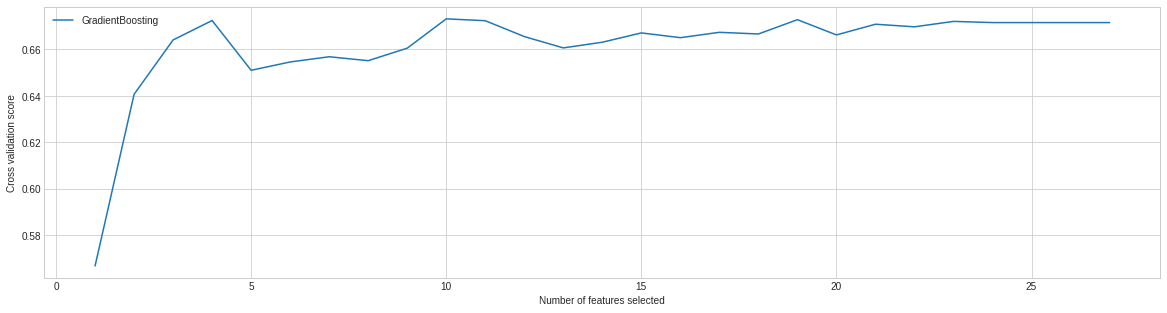

In [2]:
from sklearn.feature_selection import RFECV
selector5 = RFECV(GradientBoostingClassifier(), step=1, cv=5, scoring='accuracy')
selector5.fit(X_train, y_train)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector5.grid_scores_) + 1), selector5.grid_scores_, label ='GradientBoosting' );
plt.legend(loc='best')
plt.savefig('feature_gbc.png', bbox_inches='tight', pad_inches=1)
plt.show()

In [3]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

selector1 = RFECV(LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), step=1, cv=5, scoring='accuracy')
selector1.fit(X_train, y_train)

/home/wcx/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/wcx/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RFECV(cv=5,
   estimator=LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [14]:
print('The optimal number of features is {}'.format(selector1.n_features_))
features = [f for f,s in zip(X_train.columns, selector1.support_) if s]
print('The selected features are:')
print ('{}'.format(features))

The optimal number of features is 8


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [12]:
selected = selector1.estimator_.coef_.reshape(-1, 1)
table_rfecv = pd.DataFrame(selected, columns = ['coeff']) 
table_rfecv['feature'] = features
table_rfecv.sort_values('coeff', ascending=False)

,coeff,feature
7,55.403846,"[0.4790587585458387, 0.5349815800806316, 0.553..."
2,10.315250,"[0.4591221023287966, 0.5074668522784965, 0.446..."
1,6.688373,"[0.45879343175684517, 0.5164991622639507, 0.44..."
3,5.993194,"[0.4592206227459417, 0.4776816329046625, 0.446..."
6,3.115704,"[0.4777028914934888, 0.4478994956460841, 0.197..."
0,-1.853512,"[0.46209144309799877, 0.4749465124581667, 0.44..."
5,-2.634183,"[0.4742587146154232, 0.5370508780175834, 0.197..."
4,-3.699755,"[0.46702392431047823, 0.4812483251700086, 0.44..."


In [4]:
from sklearn.svm import SVC
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
svc = SVC(kernel='linear', C=0.4, cache_size=1000, max_iter=1000)
selector2 = RFECV(estimator=svc, step=1, cv=3, scoring='accuracy', n_jobs=-1)
selector2.fit(X_train, y_train)

/home/wcx/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/wcx/anaconda2/lib/python2.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/wcx/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/wcx/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/wcx/anaconda2/lib/python2.7/site-packages/sklearn/svm/

RFECV(cv=3,
   estimator=SVC(C=0.4, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=1000, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
   min_features_to_select=1, n_jobs=-1, scoring='accuracy', step=1,
   verbose=0)

In [5]:
selector4 = RFECV(RandomForestClassifier(criterion='gini',
            max_depth=100, max_features=0.2, n_estimators=300,), step=1, cv=5,scoring='accuracy')
selector4 = selector4.fit(X_train, y_train)

In [6]:
from sklearn.tree import DecisionTreeClassifier
selector3 = RFECV(DecisionTreeClassifier(criterion='entropy' , max_depth = 30), step=1, cv=5, scoring='accuracy')
selector3 = selector3.fit(X_train, y_train)

In [7]:
selector6 = RFECV(XGBClassifier(booster='gbtree',
                       gamma= 0, 
                       learning_rate= 0.7,
                       max_depth=30,
                       n_estimators= 400, 
                       objective= 'binary:logistic'), step=1, cv=5, scoring='accuracy')
selector6 = selector6.fit(X_train, y_train)

In [20]:
selector7 = RFECV(LGBMClassifier(boosting_type = 'gbdt',
                        learning_rate = 0.3,
                        max_depth = 27,
                        n_estimators = 400,
                        num_leaves = 30), step=1, cv=5, scoring='accuracy')
selector7 = selector7.fit(X_train, y_train)

In [26]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
selector8 = RFECV(SGDClassifier(n_jobs = -1), step=1, cv=5, scoring='accuracy')
selector8 = selector8.fit(X_train, y_train)

/home/wcx/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


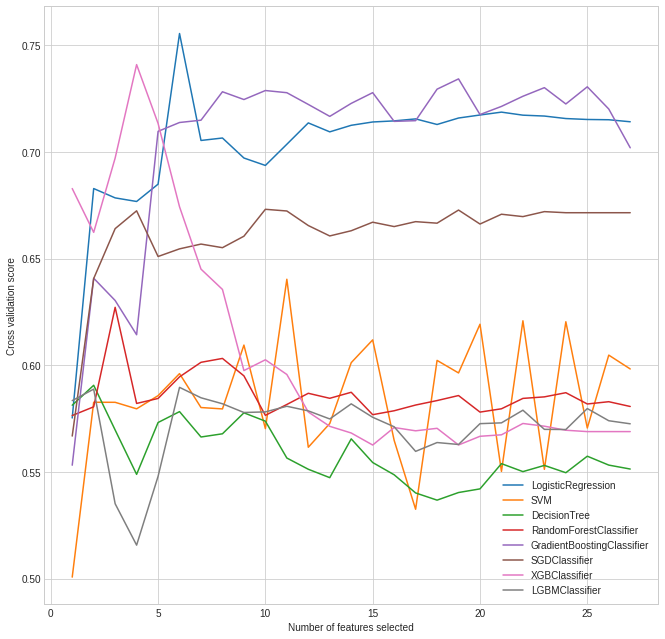

In [31]:
# Plot number of features VS. cross-validation scores
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(11,11)) 
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector1.grid_scores_) + 1), selector1.grid_scores_, label ='LogisticRegression' );
plt.plot(range(1, len(selector2.grid_scores_) + 1), selector2.grid_scores_, label ='SVM' );
plt.plot(range(1, len(selector3.grid_scores_) + 1), selector3.grid_scores_, label ='DecisionTree' );
plt.plot(range(1, len(selector4.grid_scores_) + 1), selector4.grid_scores_, label ='RandomForestClassifier' );
plt.plot(range(1, len(selector5.grid_scores_) + 1), selector5.grid_scores_, label ='GradientBoostingClassifier' );
plt.plot(range(1, len(selector8.grid_scores_) + 1), selector8.grid_scores_, label ='SGDClassifier' );
plt.plot(range(1, len(selector6.grid_scores_) + 1), selector6.grid_scores_, label ='XGBClassifier' );
plt.plot(range(1, len(selector7.grid_scores_) + 1), selector7.grid_scores_, label ='LGBMClassifier' );
plt.legend(loc='lower right')
plt.savefig('feature8.png', bbox_inches='tight', pad_inches=1)
plt.show()

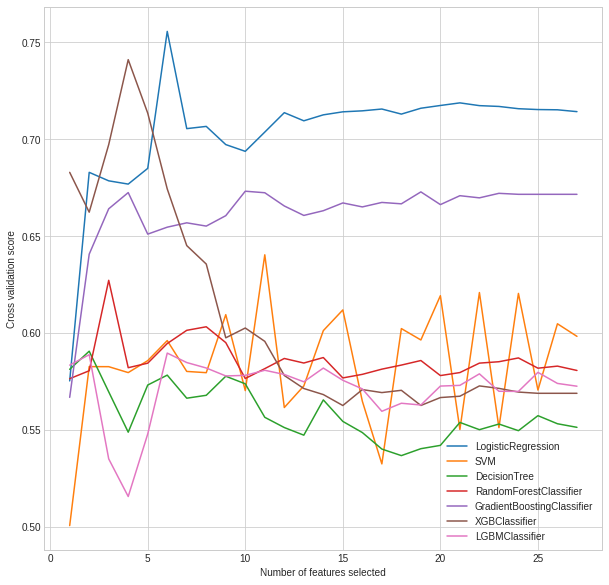

In [22]:
# Plot number of features VS. cross-validation scores
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,10)) 
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector1.grid_scores_) + 1), selector1.grid_scores_, label ='LogisticRegression' );
plt.plot(range(1, len(selector2.grid_scores_) + 1), selector2.grid_scores_, label ='SVM' );
plt.plot(range(1, len(selector3.grid_scores_) + 1), selector3.grid_scores_, label ='DecisionTree' );
plt.plot(range(1, len(selector4.grid_scores_) + 1), selector4.grid_scores_, label ='RandomForestClassifier' );
plt.plot(range(1, len(selector5.grid_scores_) + 1), selector5.grid_scores_, label ='GradientBoostingClassifier' );
plt.plot(range(1, len(selector6.grid_scores_) + 1), selector6.grid_scores_, label ='XGBClassifier' );
plt.plot(range(1, len(selector7.grid_scores_) + 1), selector7.grid_scores_, label ='LGBMClassifier' );
plt.legend(loc='lower right')
plt.savefig('feature7.png', bbox_inches='tight', pad_inches=1)
plt.show()

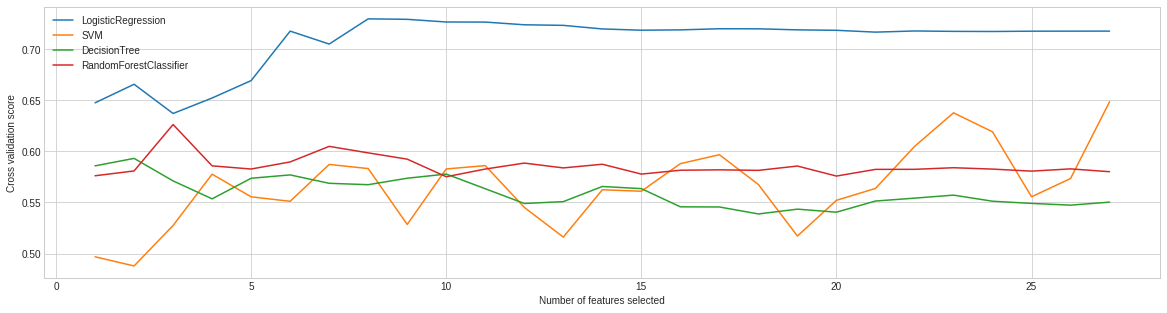

In [19]:
# Plot number of features VS. cross-validation scores
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector1.grid_scores_) + 1), selector1.grid_scores_, label ='LogisticRegression' );
plt.plot(range(1, len(selector2.grid_scores_) + 1), selector2.grid_scores_, label ='SVM' );
plt.plot(range(1, len(selector3.grid_scores_) + 1), selector3.grid_scores_, label ='DecisionTree' );
plt.plot(range(1, len(selector4.grid_scores_) + 1), selector4.grid_scores_, label ='RandomForestClassifier' );
plt.plot(range(1, len(selector5.grid_scores_) + 1), selector5.grid_scores_, label ='RandomForestClassifier' );
plt.plot(range(1, len(selector6.grid_scores_) + 1), selector6.grid_scores_, label ='RandomForestClassifier' );
plt.legend(loc='best')
plt.savefig('feature_all.png', bbox_inches='tight', pad_inches=1)
plt.show()

In [40]:
import numpy as np
features = [f for f,s in zip(X_train, selector1.support_) if s]
selected = selector1.estimator_.coef_.reshape(-1, 1)
table_rfecv = pd.DataFrame(selected, columns = ['coeff']) 
table_rfecv['feature'] = features
table_rfecv.sort_values('coeff', ascending=False)

,coeff,feature
3,3.167126,"[0.1636395724045007, -1.4120632710978736, -0.4..."
0,0.267214,"[-0.11351534352503401, -1.3599236537806043, 1...."
5,0.211692,"[0.18607223263616757, 1.2928994401413791, 1.90..."
2,-0.195844,"[0.10665607276896948, 1.357176424256365, -0.40..."
4,-0.422756,"[0.2349858533080735, 0.31845291472090104, 1.90..."
1,-6.142131,"[-0.057841195112077526, 0.3044912197848781, 1...."
